# Exploration and Visualization
**Author**: Andrea Cass

## 1. About this notebook
The purpose of this notebook is to explore and visualize some of the prepared data,

> *04_Prepared-data_limited_merged.csv*

First, the dataset will be explored with CLASS as a 3-part categorical variable (Negative, Neutral Positive). Next, all Neutral tweets will be dropped, and the dataset will be explored with CLASS as a binary variable. This is done due to the fact that CLASS will be binary in the logistic regression carried out in the subsequent Notebook.

## 2. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import os
from pathlib import Path
from datetime import datetime

## 3. Working directory & file paths

In [2]:
# find current working directory

os.getcwd()

'/Users/andycass/Jupyterlab_main-folder/THESIS/limited collection/revised'

**NOTE**: In the code line below, please insert *your* file path name between the apostrophes to set your working directory. I have left mine, `Users/andycass/Desktop/Thesis_data-and-code`, as an example.

In [3]:
# changing current working directory

os.chdir('/Users/andycass/Desktop/Thesis_data-and-code')

In [4]:
# naming the current working directory

cwd = Path.cwd()

In [5]:
# naming the CASS_thesis folder

CASS_thesis = cwd / 'CASS_thesis'

In [6]:
# double-checking the CASS_thesis location

CASS_thesis

PosixPath('/Users/andycass/Desktop/Thesis_data-and-code/CASS_thesis')

## 4. Exploring with categorical CLASS (Negative, Neutral, Positive)
In this section, the dataset will be explored with CLASS as it currently is, a 3-part categorical variable inidcating whether a tweet is Negative, Neutral, or Positive.

### 4.1. Exploring CLASS
#### 4.1.1. Exploring CLASS for entire dataset

In [7]:
df = pd.read_csv(CASS_thesis / '04_Prepared-data_limited_merged.csv', index_col=[0])

In [8]:
df

,text,author_id,created_at,lang,geo.place_id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.impression_count,...,Language,date,inflow,new text,scores,Negative,Neutral,Positive,CLASS,num_CLASS
0,"Syrisch-orthodoxer Bischof: ""Was im Nahen Oste...",4.122038e+09,2016-04-20 22:55:08+00:00,de,06d9a7c249c59bcd,0.0,0.0,0.0,0.0,0.0,...,German,2016-04-20 00:00:00+00:00,Syrians,"Syrisch-orthodoxer Bischof: ""Was im Nahen Oste...","['0.0679844', '0.88380396', '0.0482117', '']",0.067984,0.883804,0.048212,NEUTRAL,0
1,"Habe schon lang nicht gehört, daß Flüchtling G...",1.179544e+09,2016-04-20 21:27:37+00:00,de,e99b714fe65be4fb,0.0,0.0,0.0,0.0,0.0,...,German,2016-04-20 00:00:00+00:00,Syrians,"Habe schon lang nicht gehört, daß Flüchtling G...","['0.3660313', '0.5833739', '0.05059479']",0.366031,0.583374,0.050595,NEUTRAL,0
2,"""Es kommen kaum noch Flüchtlinge nach Griechen...",2.246076e+08,2016-04-20 21:18:58+00:00,de,3078869807f9dd36,0.0,0.0,0.0,0.0,0.0,...,German,2016-04-20 00:00:00+00:00,Syrians,"""Es kommen kaum noch Flüchtlinge nach Griechen...","['0.30297568', '0.4430802', '0.25394407']",0.302976,0.443080,0.253944,NEUTRAL,0
3,Unsere 1. Kochshow für #Flüchtlinge. Super spi...,2.480764e+09,2016-04-20 18:25:11+00:00,de,8abc99434d4f5d28,0.0,0.0,4.0,0.0,0.0,...,German,2016-04-20 00:00:00+00:00,Syrians,Unsere 1. Kochshow für #Flüchtlinge. Super spi...,"['0.02260253', '0.07604674', '0.9013506', '']",0.022603,0.076047,0.901351,POSITIVE,1
4,500 tote #Flüchtlinge im #Mittelmeer – Tragödi...,6.062653e+08,2016-04-20 16:27:28+00:00,de,e11a8b8e3771f9fa,0.0,1.0,0.0,0.0,0.0,...,German,2016-04-20 00:00:00+00:00,Syrians,500 tote #Flüchtlinge im #Mittelmeer – Tragödi...,"['0.6982864', '0.27545568', '0.02625783']",0.698286,0.275456,0.026258,NEGATIVE,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66261,"For day 1 of week 2, @AnnaMariaKonsta discusse...",1.104025e+08,2021-06-28 14:43:31+00:00,en,fcbb3c6e0a7eba22,0.0,1.0,2.0,0.0,0.0,...,English,2021-06-28 00:00:00+00:00,Ukrainians,"For day 1 of week 2, @user discusses the Socia...","['0.03550766', '0.82208896', '0.14240335']",0.035508,0.822089,0.142403,NEUTRAL,0
66262,"@ariadneconill Europe is racist, but in a diff...",2.521809e+09,2021-06-27 13:03:29+00:00,en,e385d4d639c6a423,0.0,1.0,6.0,0.0,0.0,...,English,2021-06-27 00:00:00+00:00,Ukrainians,"@user Europe is racist, but in a different way...","['0.8931986', '0.09380516', '0.01299612']",0.893199,0.093805,0.012996,NEGATIVE,-1
66263,"A labour of love, inspired by Middle-earth.\n\...",5.633818e+08,2021-06-27 08:37:21+00:00,en,257640324f249a73,0.0,1.0,17.0,0.0,0.0,...,English,2021-06-27 00:00:00+00:00,Ukrainians,"A labour of love, inspired by Middle-earth.\n\...","['0.15655968', '0.5201203', '0.32332003']",0.156560,0.520120,0.323320,NEUTRAL,0
66264,@simongerman600 I must have missed the great f...,2.591892e+09,2021-06-26 08:03:22+00:00,en,000b71538f35fe46,0.0,0.0,1.0,0.0,0.0,...,English,2021-06-26 00:00:00+00:00,Ukrainians,@user I must have missed the great flight of t...,"['0.91320664', '0.06375945', '0.02303378']",0.913207,0.063759,0.023034,NEGATIVE,-1


In [9]:
df = df.reset_index(drop=True)

In [10]:
df

,text,author_id,created_at,lang,geo.place_id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.impression_count,...,Language,date,inflow,new text,scores,Negative,Neutral,Positive,CLASS,num_CLASS
0,"Syrisch-orthodoxer Bischof: ""Was im Nahen Oste...",4.122038e+09,2016-04-20 22:55:08+00:00,de,06d9a7c249c59bcd,0.0,0.0,0.0,0.0,0.0,...,German,2016-04-20 00:00:00+00:00,Syrians,"Syrisch-orthodoxer Bischof: ""Was im Nahen Oste...","['0.0679844', '0.88380396', '0.0482117', '']",0.067984,0.883804,0.048212,NEUTRAL,0
1,"Habe schon lang nicht gehört, daß Flüchtling G...",1.179544e+09,2016-04-20 21:27:37+00:00,de,e99b714fe65be4fb,0.0,0.0,0.0,0.0,0.0,...,German,2016-04-20 00:00:00+00:00,Syrians,"Habe schon lang nicht gehört, daß Flüchtling G...","['0.3660313', '0.5833739', '0.05059479']",0.366031,0.583374,0.050595,NEUTRAL,0
2,"""Es kommen kaum noch Flüchtlinge nach Griechen...",2.246076e+08,2016-04-20 21:18:58+00:00,de,3078869807f9dd36,0.0,0.0,0.0,0.0,0.0,...,German,2016-04-20 00:00:00+00:00,Syrians,"""Es kommen kaum noch Flüchtlinge nach Griechen...","['0.30297568', '0.4430802', '0.25394407']",0.302976,0.443080,0.253944,NEUTRAL,0
3,Unsere 1. Kochshow für #Flüchtlinge. Super spi...,2.480764e+09,2016-04-20 18:25:11+00:00,de,8abc99434d4f5d28,0.0,0.0,4.0,0.0,0.0,...,German,2016-04-20 00:00:00+00:00,Syrians,Unsere 1. Kochshow für #Flüchtlinge. Super spi...,"['0.02260253', '0.07604674', '0.9013506', '']",0.022603,0.076047,0.901351,POSITIVE,1
4,500 tote #Flüchtlinge im #Mittelmeer – Tragödi...,6.062653e+08,2016-04-20 16:27:28+00:00,de,e11a8b8e3771f9fa,0.0,1.0,0.0,0.0,0.0,...,German,2016-04-20 00:00:00+00:00,Syrians,500 tote #Flüchtlinge im #Mittelmeer – Tragödi...,"['0.6982864', '0.27545568', '0.02625783']",0.698286,0.275456,0.026258,NEGATIVE,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66259,"For day 1 of week 2, @AnnaMariaKonsta discusse...",1.104025e+08,2021-06-28 14:43:31+00:00,en,fcbb3c6e0a7eba22,0.0,1.0,2.0,0.0,0.0,...,English,2021-06-28 00:00:00+00:00,Ukrainians,"For day 1 of week 2, @user discusses the Socia...","['0.03550766', '0.82208896', '0.14240335']",0.035508,0.822089,0.142403,NEUTRAL,0
66260,"@ariadneconill Europe is racist, but in a diff...",2.521809e+09,2021-06-27 13:03:29+00:00,en,e385d4d639c6a423,0.0,1.0,6.0,0.0,0.0,...,English,2021-06-27 00:00:00+00:00,Ukrainians,"@user Europe is racist, but in a different way...","['0.8931986', '0.09380516', '0.01299612']",0.893199,0.093805,0.012996,NEGATIVE,-1
66261,"A labour of love, inspired by Middle-earth.\n\...",5.633818e+08,2021-06-27 08:37:21+00:00,en,257640324f249a73,0.0,1.0,17.0,0.0,0.0,...,English,2021-06-27 00:00:00+00:00,Ukrainians,"A labour of love, inspired by Middle-earth.\n\...","['0.15655968', '0.5201203', '0.32332003']",0.156560,0.520120,0.323320,NEUTRAL,0
66262,@simongerman600 I must have missed the great f...,2.591892e+09,2021-06-26 08:03:22+00:00,en,000b71538f35fe46,0.0,0.0,1.0,0.0,0.0,...,English,2021-06-26 00:00:00+00:00,Ukrainians,@user I must have missed the great flight of t...,"['0.91320664', '0.06375945', '0.02303378']",0.913207,0.063759,0.023034,NEGATIVE,-1


In [11]:
# getting the unique value counts of CLASS (absolute frequency)

df['CLASS'].value_counts()

NEUTRAL     44737
NEGATIVE    17702
POSITIVE     3825
Name: CLASS, dtype: int64

In [12]:
# getting the relative frequencies of CLASS

df['CLASS'].value_counts(normalize=True)

NEUTRAL     0.675133
NEGATIVE    0.267144
POSITIVE    0.057724
Name: CLASS, dtype: float64

<AxesSubplot: ylabel='CLASS'>

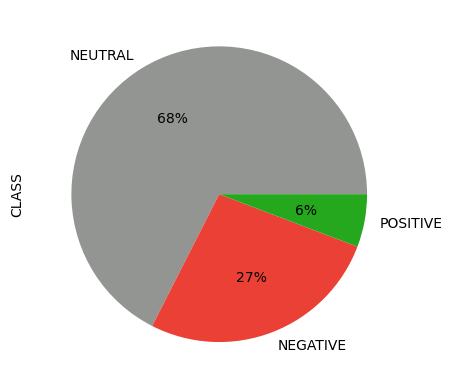

In [13]:
# pie chart

# first color: greyish hex code
# second color : redish hex code
# third color: greenish hex code

colors = '#939593', '#EA4035', '#25A81E'

# adding percentages

df.CLASS.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=colors)

#### Remarks
We can see that about two-thirds of all tweets are neutral, under one-third of all tweets are negative, and a much smaller proportion of tweets are positive

#### 4.1.2. Exploring CLASS by inflow

In [14]:
# getting the unique value counts of inflow (absolute frequency)

df['inflow'].value_counts()

Ukrainians    41634
Syrians       24630
Name: inflow, dtype: int64

In [15]:
# getting the relative frequencies of inflow

df['inflow'].value_counts(normalize=True)

Ukrainians    0.628305
Syrians       0.371695
Name: inflow, dtype: float64

In [16]:
# finding the proportion of classes by inflow

byinflow = df.groupby('inflow').CLASS.value_counts(normalize=True)
byinflow

inflow      CLASS   
Syrians     NEUTRAL     0.546041
            NEGATIVE    0.366382
            POSITIVE    0.087576
Ukrainians  NEUTRAL     0.751501
            NEGATIVE    0.208435
            POSITIVE    0.040063
Name: CLASS, dtype: float64

#### Remarks
We can see that, for both inflows, the largest proportion of tweets were neutral. However, tweets during the Ukrainian inflow tended to be more neutral compared with those during the Syrian inflow.

We also see that, for both inflows, the smallest proportion of tweets were positive. However, tweets surrounding the Syrian inflow tended to be more positive compared with those during the Ukrainian inflow.

Despite the proportion of positive tweets surrounding the Syrian inflow being larger than that of the Ukrainian inflow, the proportion of negative tweets surrounding the Syrian inflow were also larger than that of the Ukrainian inflow. This suggests that there was greater polarization surrounding the Syrian inflow compared with the Ukrainian inflow (more negativity and more positivity)

In [17]:
# creating Syrian and Ukrainian datasets

df_syr = df[df.inflow=='Syrians'].copy()
df_uk = df[df.inflow=='Ukrainians'].copy()

In [18]:
# examining num_CLASS for Syrian dataset

df_syr.num_CLASS.describe()

count    24630.000000
mean        -0.278806
std          0.613385
min         -1.000000
25%         -1.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: num_CLASS, dtype: float64

In [19]:
# examining num_CLASS for Ukrainian dataset

df_uk.num_CLASS.describe()

count    41634.000000
mean        -0.168372
std          0.469207
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: num_CLASS, dtype: float64

### 4.2. Examining example tweets

#### 4.2.1. Engligh tweets
#### *Positive tweets*

In [20]:
# creating a dataframe for the positive tweets in English

posdf = df[(df.CLASS == "POSITIVE")&(df.Language =="English")].copy()

In [21]:
posdf

,text,author_id,created_at,lang,geo.place_id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.impression_count,...,Language,date,inflow,new text,scores,Negative,Neutral,Positive,CLASS,num_CLASS
19461,Syrian artists are painting bright murals in t...,4.126248e+08,2016-04-20 15:00:39+00:00,en,3078869807f9dd36,0.0,0.0,1.0,0.0,0.0,...,English,2016-04-20 00:00:00+00:00,Syrians,Syrian artists are painting bright murals in t...,"['0.08154873', '0.41864425', '0.49980706']",0.081549,0.418644,0.499807,POSITIVE,1
19462,Paul Guest is an excellent moderator at the co...,2.863753e+09,2016-04-20 09:02:57+00:00,en,09529a8849972000,1.0,0.0,3.0,0.0,0.0,...,English,2016-04-20 00:00:00+00:00,Syrians,Paul Guest is an excellent moderator at the co...,"['0.02515743', '0.12779205', '0.8470506', '']",0.025157,0.127792,0.847051,POSITIVE,1
19467,Had a great experience today teaching baseball...,3.731578e+08,2016-04-19 14:33:15+00:00,en,d2c1d68a32db499e,1.0,0.0,1.0,0.0,0.0,...,English,2016-04-19 00:00:00+00:00,Syrians,Had a great experience today teaching baseball...,"['0.0366207', '0.252728', '0.7106512']",0.036621,0.252728,0.710651,POSITIVE,1
19477,Yestrdy kick-off creative-coding-school for re...,2.559953e+08,2016-04-19 06:53:16+00:00,en,3078869807f9dd36,5.0,1.0,11.0,0.0,0.0,...,English,2016-04-19 00:00:00+00:00,Syrians,Yestrdy kick-off creative-coding-school for re...,"['0.03588654', '0.0829671', '0.88114643']",0.035887,0.082967,0.881146,POSITIVE,1
19478,Amazing possibilities due to #VirtualReality! ...,3.316810e+09,2016-04-19 06:21:08+00:00,en,8abc99434d4f5d28,0.0,1.0,4.0,0.0,0.0,...,English,2016-04-19 00:00:00+00:00,Syrians,Amazing possibilities due to #VirtualReality! ...,"['0.04151905', '0.12010492', '0.83837605']",0.041519,0.120105,0.838376,POSITIVE,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66235,Very emotional Panel @OneYoungWorld 2021 summi...,1.358377e+18,2021-07-25 14:36:50+00:00,en,37439688c6302728,2.0,0.0,8.0,0.0,0.0,...,English,2021-07-25 00:00:00+00:00,Ukrainians,Very emotional Panel @user 2021 summit! Refuge...,"['0.10797562', '0.2849428', '0.6070816', '']",0.107976,0.284943,0.607082,POSITIVE,1
66240,Opening ceremony at @OneYoungWorld. This is TH...,4.174531e+06,2021-07-22 17:02:07+00:00,en,11d6739db0947001,8.0,1.0,23.0,0.0,0.0,...,English,2021-07-22 00:00:00+00:00,Ukrainians,Opening ceremony at @user This is THE global c...,"['0.03534435', '0.15201348', '0.8126422', '']",0.035344,0.152013,0.812642,POSITIVE,1
66241,I love the Girls Ukrainian 🇺🇦 ❤ https://t.co/P...,1.344970e+18,2021-07-22 14:22:23+00:00,en,c589d9d6ed38927c,0.0,0.0,0.0,0.0,0.0,...,English,2021-07-22 00:00:00+00:00,Ukrainians,I love the Girls Ukrainian 🇺🇦 ❤ http,"['0.02631216', '0.15764418', '0.8160437', '']",0.026312,0.157644,0.816044,POSITIVE,1
66246,I am aware and grateful that I live in safety ...,1.323016e+18,2021-07-14 18:33:50+00:00,en,37439688c6302728,0.0,0.0,1.0,0.0,0.0,...,English,2021-07-14 00:00:00+00:00,Ukrainians,I am aware and grateful that I live in safety ...,"['0.18224835', '0.2349472', '0.58280456']",0.182248,0.234947,0.582805,POSITIVE,1


In [22]:
posdf.loc[19461, 'new text']

'Syrian artists are painting bright murals in this refugee camp to remind them of home http via @user'

In [23]:
posdf.loc[19462, 'new text']

'Paul Guest is an excellent moderator at the conference on refugees in Essen. #tcaepi http'

In [24]:
posdf.loc[19467, 'new text']

'Had a great experience today teaching baseball to refugees. These kids fled from Syria, Iraq,… http'

In [25]:
posdf.loc[19477, 'new text']

'Yestrdy kick-off creative-coding-school for refugees and newcomers in Berlin. Thrilling! We learnt &amp; laughed a lot! http'

In [26]:
posdf.loc[19478, 'new text']

"Amazing possibilities due to #VirtualReality! I'm touched:\nhttps://t.co/tNyadIa9H4\n#empathy #innovation #refugees #future #startup"

In [27]:
posdf.loc[66235, 'new text']

'Very emotional Panel @user 2021 summit! Refugees with disabilities have a right to sit on the table, when we speak about solving the problems of fleeing from their home countries! #oyw2021 #peace #oneyoungworld http'

In [28]:
posdf.loc[66240, 'new text']

'Opening ceremony at @user This is THE global conference, isn’t it 👏 Of course we have the Refugees Nation flag among us. #OYW2021 http'

In [29]:
posdf.loc[66241, 'new text']

'I love the Girls Ukrainian 🇺🇦 ❤ http'

In [30]:
posdf.loc[66246, 'new text']

'I am aware and grateful that I live in safety and comfort. For millions of families it is a fight for survival, in refugees camps or in the midst of war. 😪😪😪'

#### *Neutral tweets*

In [31]:
# creating a dataframe for the neutral tweets in English

neutdf = df[(df.CLASS == "NEUTRAL")&(df.Language =="English")].copy()

In [32]:
neutdf

,text,author_id,created_at,lang,geo.place_id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.impression_count,...,Language,date,inflow,new text,scores,Negative,Neutral,Positive,CLASS,num_CLASS
19463,DEN : According to a Jerusalem Post review of ...,1.868999e+08,2016-04-20 01:06:13+00:00,en,3078869807f9dd36,0.0,0.0,0.0,0.0,0.0,...,English,2016-04-20 00:00:00+00:00,Syrians,DEN : According to a Jerusalem Post review of ...,"['0.10565308', '0.8295066', '0.06484035']",0.105653,0.829507,0.064840,NEUTRAL,0
19465,so my refugee support space apparently has an ...,1.518836e+08,2016-04-19 18:48:58+00:00,en,3078869807f9dd36,0.0,0.0,0.0,0.0,0.0,...,English,2016-04-19 00:00:00+00:00,Syrians,so my refugee support space apparently has an ...,"['0.17263961', '0.7082667', '0.11909354']",0.172640,0.708267,0.119094,NEUTRAL,0
19466,The Refugee project @TCAEPI market place https...,5.764011e+08,2016-04-19 14:36:09+00:00,en,08f94128283f7bc6,0.0,0.0,0.0,0.0,0.0,...,English,2016-04-19 00:00:00+00:00,Syrians,The Refugee project @user market place http,"['0.01883965', '0.939873', '0.04128719']",0.018840,0.939873,0.041287,NEUTRAL,0
19468,#CelioGermanyDesk Refugees in Germany: 'I want...,2.717762e+08,2016-04-19 13:07:06+00:00,en,b7d3c12268abd20e,0.0,0.0,0.0,0.0,0.0,...,English,2016-04-19 00:00:00+00:00,Syrians,#CelioGermanyDesk Refugees in Germany: 'I want...,"['0.2557592', '0.7020924', '0.04214845']",0.255759,0.702092,0.042148,NEUTRAL,0
19469,images from last night's talks on challenges o...,2.180311e+09,2016-04-19 12:26:57+00:00,en,3078869807f9dd36,0.0,0.0,0.0,0.0,0.0,...,English,2016-04-19 00:00:00+00:00,Syrians,images from last night's talks on challenges o...,"['0.31558016', '0.6487267', '0.03569311']",0.315580,0.648727,0.035693,NEUTRAL,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66248,So now I’m a German language refugee - for the...,3.678272e+08,2021-07-13 12:09:28+00:00,en,1b9b5e83e647a7ed,1.0,2.0,21.0,0.0,0.0,...,English,2021-07-13 00:00:00+00:00,Ukrainians,So now I’m a German language refugee - for the...,"['0.10139625', '0.82993', '0.06867384']",0.101396,0.829930,0.068674,NEUTRAL,0
66249,@Matthew__Watson @simongerman600 According to ...,1.303516e+18,2021-07-12 19:54:52+00:00,en,5b1a29f98ababf57,0.0,1.0,1.0,0.0,0.0,...,English,2021-07-12 00:00:00+00:00,Ukrainians,@user @user According to duolingo in Sweden it...,"['0.17023861', '0.7968332', '0.03292825']",0.170239,0.796833,0.032928,NEUTRAL,0
66258,"First in refugee camp, than 👷 apartment, on a ...",1.318230e+18,2021-06-29 13:07:19+00:00,en,742058e71a02c75a,0.0,0.0,0.0,0.0,0.0,...,English,2021-06-29 00:00:00+00:00,Ukrainians,"First in refugee camp, than 👷 apartment, on a ...","['0.3426658', '0.5948538', '0.06248048']",0.342666,0.594854,0.062480,NEUTRAL,0
66259,"For day 1 of week 2, @AnnaMariaKonsta discusse...",1.104025e+08,2021-06-28 14:43:31+00:00,en,fcbb3c6e0a7eba22,0.0,1.0,2.0,0.0,0.0,...,English,2021-06-28 00:00:00+00:00,Ukrainians,"For day 1 of week 2, @user discusses the Socia...","['0.03550766', '0.82208896', '0.14240335']",0.035508,0.822089,0.142403,NEUTRAL,0


In [33]:
neutdf.loc[19463, 'new text']

'DEN : According to a Jerusalem Post review of the 2014 Berlin intelligence report, the most recent document… http'

In [34]:
neutdf.loc[19465, 'new text']

'so my refugee support space apparently has an old 70s style Telefonzelle #fancy @ Berlin, Germany http'

In [35]:
neutdf.loc[19466, 'new text']

'The Refugee project @user market place http'

In [36]:
neutdf.loc[19468, 'new text']

"#CelioGermanyDesk Refugees in Germany: 'I want to integrate, but how?' http"

In [37]:
neutdf.loc[66248, 'new text']

'So now I’m a German language refugee - for the time being. http'

In [38]:
neutdf.loc[66258, 'new text']

'First in refugee camp, than 👷 apartment, on a dozen square meters with two kids and Spanish neighbors in Dallas house, handwashes'

In [39]:
neutdf.loc[66259, 'new text']

'For day 1 of week 2, @user discusses the Social Rights of Refugees @user #SocialRights'

#### *Negative tweets*

In [40]:
# creating a dataframe for the negative tweets in English

negdf = df[(df.CLASS == "NEGATIVE")&(df.Language =="English")].copy()

In [41]:
negdf

,text,author_id,created_at,lang,geo.place_id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.impression_count,...,Language,date,inflow,new text,scores,Negative,Neutral,Positive,CLASS,num_CLASS
19460,UNHCR - Survivors report massive loss of life ...,3.398338e+08,2016-04-20 19:54:13+00:00,en,e99b714fe65be4fb,0.0,0.0,0.0,0.0,0.0,...,English,2016-04-20 00:00:00+00:00,Syrians,UNHCR - Survivors report massive loss of life ...,"['0.82628405', '0.1604244', '0.01329154']",0.826284,0.160424,0.013292,NEGATIVE,-1
19464,Why #europe are sending #syrian #refugees to #...,6.941809e+07,2016-04-19 20:22:50+00:00,en,659395aaea6aa724,1.0,0.0,1.0,0.0,0.0,...,English,2016-04-19 00:00:00+00:00,Syrians,Why #europe are sending #syrian #refugees to #...,"['0.93451184', '0.05480343', '0.01068454']",0.934512,0.054803,0.010685,NEGATIVE,-1
19471,b/c of danger that Grassmann daughters could i...,2.202075e+09,2016-04-19 10:17:14+00:00,en,8abc99434d4f5d28,0.0,0.0,0.0,0.0,0.0,...,English,2016-04-19 00:00:00+00:00,Syrians,b/c of danger that Grassmann daughters could i...,"['0.8155252', '0.15633164', '0.02814315']",0.815525,0.156332,0.028143,NEGATIVE,-1
19472,Aim of aggression: the Grassmann-family. Reaso...,2.202075e+09,2016-04-19 10:03:13+00:00,en,8abc99434d4f5d28,0.0,0.0,0.0,0.0,0.0,...,English,2016-04-19 00:00:00+00:00,Syrians,Aim of aggression: the Grassmann-family. Reaso...,"['0.8382202', '0.14739114', '0.01438861']",0.838220,0.147391,0.014389,NEGATIVE,-1
19483,"'Several hundred' refugees from #Somalia, #Eth...",3.398338e+08,2016-04-18 20:29:18+00:00,en,e99b714fe65be4fb,1.0,0.0,0.0,0.0,0.0,...,English,2016-04-18 00:00:00+00:00,Syrians,"'Several hundred' refugees from #Somalia, #Eth...","['0.8409549', '0.14652047', '0.01252455']",0.840955,0.146520,0.012525,NEGATIVE,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66255,"@VP My friend, I did both shots. My fav. is to...",1.081214e+18,2021-07-06 16:15:40+00:00,en,772095b73ce266f1,0.0,0.0,0.0,0.0,0.0,...,English,2021-07-06 00:00:00+00:00,Ukrainians,"@user My friend, I did both shots. My fav. is ...","['0.338309', '0.32545546', '0.3362356', '']",0.338309,0.325455,0.336236,NEGATIVE,-1
66256,"@RGrahamPE1 @maxrushden Agree, when you look a...",4.155022e+07,2021-06-30 10:41:16+00:00,en,c589d9d6ed38927c,0.0,0.0,0.0,0.0,0.0,...,English,2021-06-30 00:00:00+00:00,Ukrainians,"@user @user Agree, when you look at this photo...","['0.8435582', '0.12455335', '0.03188848']",0.843558,0.124553,0.031888,NEGATIVE,-1
66260,"@ariadneconill Europe is racist, but in a diff...",2.521809e+09,2021-06-27 13:03:29+00:00,en,e385d4d639c6a423,0.0,1.0,6.0,0.0,0.0,...,English,2021-06-27 00:00:00+00:00,Ukrainians,"@user Europe is racist, but in a different way...","['0.8931986', '0.09380516', '0.01299612']",0.893199,0.093805,0.012996,NEGATIVE,-1
66262,@simongerman600 I must have missed the great f...,2.591892e+09,2021-06-26 08:03:22+00:00,en,000b71538f35fe46,0.0,0.0,1.0,0.0,0.0,...,English,2021-06-26 00:00:00+00:00,Ukrainians,@user I must have missed the great flight of t...,"['0.91320664', '0.06375945', '0.02303378']",0.913207,0.063759,0.023034,NEGATIVE,-1


In [42]:
negdf.loc[19460, 'new text']

'UNHCR - Survivors report massive loss of life in latest Mediterranean Sea tragedy http via @user'

In [43]:
negdf.loc[19464, 'new text']

'Why #europe are sending #syrian #refugees to #turkey ??? #humanrights says its not a good idea.… http'

In [44]:
negdf.loc[19471, 'new text']

'b/c of danger that Grassmann daughters could influence Syrian &amp; Palestinian refugees towards anti-zionism, AJC thinks firing is the best.'

In [45]:
negdf.loc[19483, 'new text']

"'Several hundred' refugees\xa0from #Somalia, #Ethiopia and #Eritrea just drowned in the Mediterranean http"

In [46]:
negdf.loc[66255, 'new text']

'@user My friend, I did both shots. My fav. is to help others to get it, too! Specially I help elderlies+refugees understand the need+to trust in the vaccines,refugees often search at Google cause they only know so little about the stuff. Google tells a lot about sideffects. Makes fear.'

In [47]:
negdf.loc[66260, 'new text']

'@user Europe is racist, but in a different way than the US. There has been a lot of anti-PoC settlement too since the 2016 refugee crisis and subsequent rise of far-right parties like the AfD, but anti-Slawic/anti-Romani settlement is a big issue to which no one seems to talk about -_-'

In [48]:
negdf.loc[66263, 'new text']

'#Wuerzburg today an African immigrant or refugee, dunno, slaughtered three pedestrians and injured 6! \n@YlvaJohansson how successfully do you believe that EU can migrate third world illegals with a mindset totally foreign to EU standards? http'

### 4.3 Exploring by date
#### 4.3.1 Moving Average Sentiment

In [49]:
df['year-month'].value_counts()

2015-09    4909
2022-03    3116
2015-10    2823
2015-11    2603
2016-01    2403
2016-02    2217
2015-08    2188
2015-12    1726
2016-03    1712
2022-04    1469
2022-09    1406
2022-05    1338
2022-10    1135
2022-06    1022
2022-08    1002
2022-07    1001
2022-02     922
2015-07     876
2016-04     734
2015-04     521
2015-06     520
2015-05     405
2015-01     339
2021-11     331
2021-08     314
2015-02     287
2015-03     245
2022-01     239
2021-10     192
2021-09     165
2021-12     157
2021-07     128
2014-12     119
2021-06      47
Name: year-month, dtype: int64

In [50]:
# making new date_time variable

df["date_time"] = pd.to_datetime(df["created_at"], format = '%Y-%m-%d')

In [51]:
# getting rid of timezone

df['date_time'] = df['date_time'].apply(lambda x: x.replace(tzinfo=None))

In [52]:
df

,text,author_id,created_at,lang,geo.place_id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.impression_count,...,date,inflow,new text,scores,Negative,Neutral,Positive,CLASS,num_CLASS,date_time
0,"Syrisch-orthodoxer Bischof: ""Was im Nahen Oste...",4.122038e+09,2016-04-20 22:55:08+00:00,de,06d9a7c249c59bcd,0.0,0.0,0.0,0.0,0.0,...,2016-04-20 00:00:00+00:00,Syrians,"Syrisch-orthodoxer Bischof: ""Was im Nahen Oste...","['0.0679844', '0.88380396', '0.0482117', '']",0.067984,0.883804,0.048212,NEUTRAL,0,2016-04-20 22:55:08
1,"Habe schon lang nicht gehört, daß Flüchtling G...",1.179544e+09,2016-04-20 21:27:37+00:00,de,e99b714fe65be4fb,0.0,0.0,0.0,0.0,0.0,...,2016-04-20 00:00:00+00:00,Syrians,"Habe schon lang nicht gehört, daß Flüchtling G...","['0.3660313', '0.5833739', '0.05059479']",0.366031,0.583374,0.050595,NEUTRAL,0,2016-04-20 21:27:37
2,"""Es kommen kaum noch Flüchtlinge nach Griechen...",2.246076e+08,2016-04-20 21:18:58+00:00,de,3078869807f9dd36,0.0,0.0,0.0,0.0,0.0,...,2016-04-20 00:00:00+00:00,Syrians,"""Es kommen kaum noch Flüchtlinge nach Griechen...","['0.30297568', '0.4430802', '0.25394407']",0.302976,0.443080,0.253944,NEUTRAL,0,2016-04-20 21:18:58
3,Unsere 1. Kochshow für #Flüchtlinge. Super spi...,2.480764e+09,2016-04-20 18:25:11+00:00,de,8abc99434d4f5d28,0.0,0.0,4.0,0.0,0.0,...,2016-04-20 00:00:00+00:00,Syrians,Unsere 1. Kochshow für #Flüchtlinge. Super spi...,"['0.02260253', '0.07604674', '0.9013506', '']",0.022603,0.076047,0.901351,POSITIVE,1,2016-04-20 18:25:11
4,500 tote #Flüchtlinge im #Mittelmeer – Tragödi...,6.062653e+08,2016-04-20 16:27:28+00:00,de,e11a8b8e3771f9fa,0.0,1.0,0.0,0.0,0.0,...,2016-04-20 00:00:00+00:00,Syrians,500 tote #Flüchtlinge im #Mittelmeer – Tragödi...,"['0.6982864', '0.27545568', '0.02625783']",0.698286,0.275456,0.026258,NEGATIVE,-1,2016-04-20 16:27:28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66259,"For day 1 of week 2, @AnnaMariaKonsta discusse...",1.104025e+08,2021-06-28 14:43:31+00:00,en,fcbb3c6e0a7eba22,0.0,1.0,2.0,0.0,0.0,...,2021-06-28 00:00:00+00:00,Ukrainians,"For day 1 of week 2, @user discusses the Socia...","['0.03550766', '0.82208896', '0.14240335']",0.035508,0.822089,0.142403,NEUTRAL,0,2021-06-28 14:43:31
66260,"@ariadneconill Europe is racist, but in a diff...",2.521809e+09,2021-06-27 13:03:29+00:00,en,e385d4d639c6a423,0.0,1.0,6.0,0.0,0.0,...,2021-06-27 00:00:00+00:00,Ukrainians,"@user Europe is racist, but in a different way...","['0.8931986', '0.09380516', '0.01299612']",0.893199,0.093805,0.012996,NEGATIVE,-1,2021-06-27 13:03:29
66261,"A labour of love, inspired by Middle-earth.\n\...",5.633818e+08,2021-06-27 08:37:21+00:00,en,257640324f249a73,0.0,1.0,17.0,0.0,0.0,...,2021-06-27 00:00:00+00:00,Ukrainians,"A labour of love, inspired by Middle-earth.\n\...","['0.15655968', '0.5201203', '0.32332003']",0.156560,0.520120,0.323320,NEUTRAL,0,2021-06-27 08:37:21
66262,@simongerman600 I must have missed the great f...,2.591892e+09,2021-06-26 08:03:22+00:00,en,000b71538f35fe46,0.0,0.0,1.0,0.0,0.0,...,2021-06-26 00:00:00+00:00,Ukrainians,@user I must have missed the great flight of t...,"['0.91320664', '0.06375945', '0.02303378']",0.913207,0.063759,0.023034,NEGATIVE,-1,2021-06-26 08:03:22


In [53]:
# creating Moving Averages of num_CLASS

syrian = df[df['inflow']=='Syrians'][['date_time', 'num_CLASS']]
syrian = syrian.sort_values(by='date_time', ascending=True)
syrian['Moving Average Sentiment'] = syrian.num_CLASS.rolling(20, min_periods=3).mean()

ukrainian = df[df['inflow']=='Ukrainians'][['date_time', 'num_CLASS']]
ukrainian = ukrainian.sort_values(by='date_time', ascending=True)
ukrainian['Moving Average Sentiment'] = ukrainian.num_CLASS.rolling(20, min_periods=3).mean()


In [54]:
plt.style.use('tableau-colorblind10')

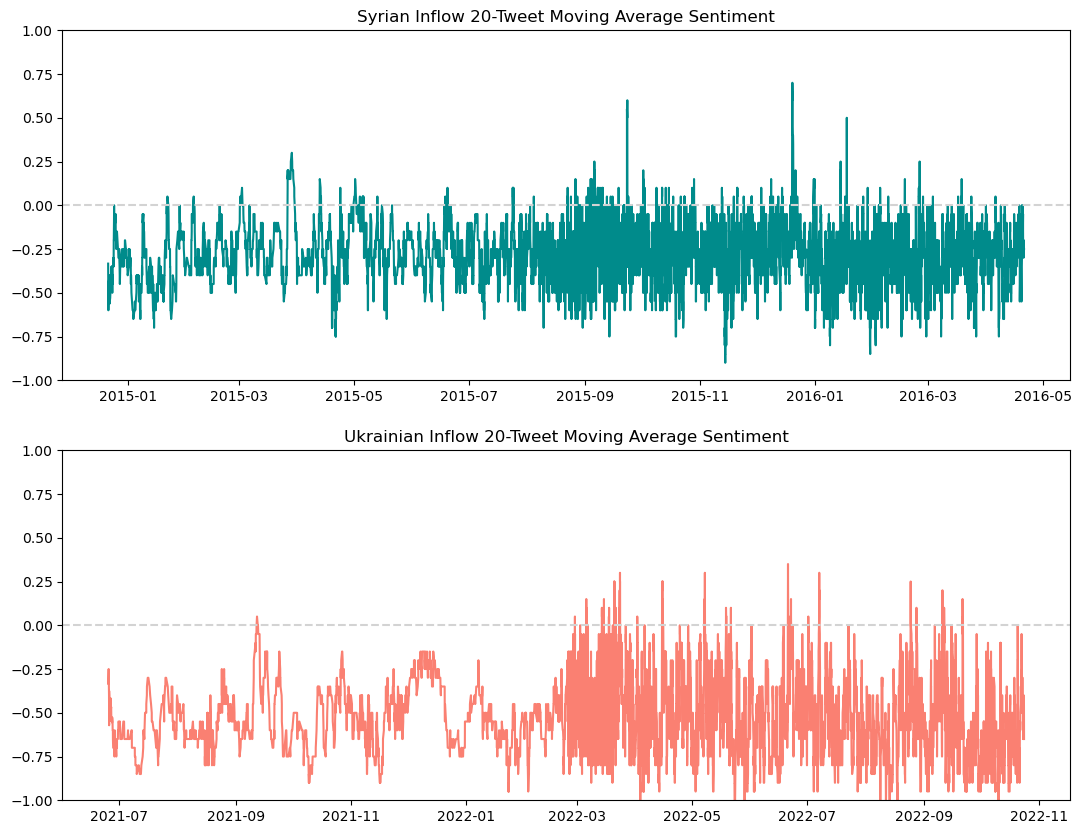

In [55]:
# plotting Moving Averages for each inflow

fix, axes = plt.subplots(2,1, figsize=(13,10))

custom_ylim = (-1,1)

plt.setp(axes, ylim=custom_ylim)

axes[0].plot(syrian['date_time'], syrian['Moving Average Sentiment'], color = 'darkcyan')
axes[0].set_title("\n".join(['Syrian Inflow 20-Tweet Moving Average Sentiment']))

axes[0].axhline(0, color='lightgrey', ls='--')

axes[1].plot(ukrainian['date_time'], ukrainian['Moving Average Sentiment'], color = 'salmon')
axes[1].set_title("\n".join(['Ukrainian Inflow 20-Tweet Moving Average Sentiment']))

axes[1].axhline(0, color='lightgrey', ls='--')

plt.savefig('10-Tweet_Moving-Avg.png', bbox_inches='tight' , dpi=200)
plt.show()

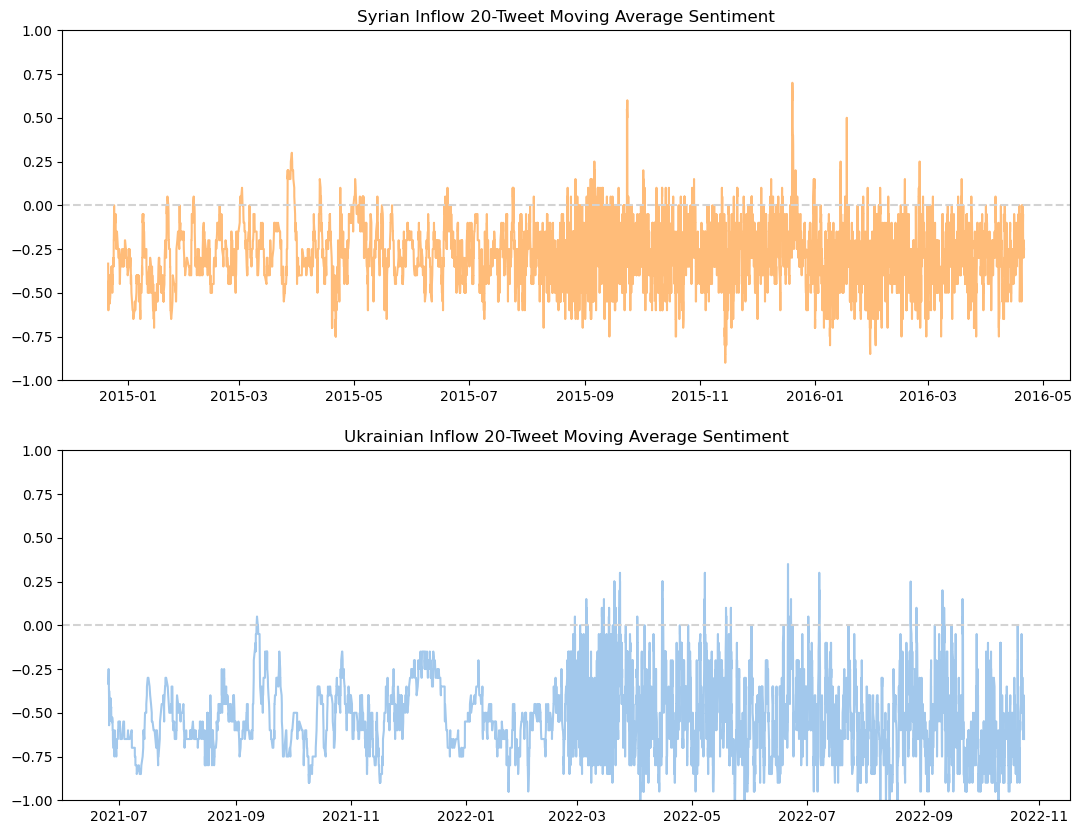

In [56]:
# plotting Moving Averages for each inflow using colorblind-friendly colors

fix, axes = plt.subplots(2,1, figsize=(13,10))

custom_ylim = (-1,1)

plt.setp(axes, ylim=custom_ylim)

axes[0].plot(syrian['date_time'], syrian['Moving Average Sentiment'], color='#FFBC79')
axes[0].set_title("\n".join(['Syrian Inflow 20-Tweet Moving Average Sentiment']))

axes[0].axhline(0, color='lightgrey', ls='--')

axes[1].plot(ukrainian['date_time'], ukrainian['Moving Average Sentiment'], color='#A2C8EC')
axes[1].set_title("\n".join(['Ukrainian Inflow 20-Tweet Moving Average Sentiment']))

axes[1].axhline(0, color='lightgrey', ls='--')

plt.savefig('10-Tweet_Moving-Avg_colorblind.png', bbox_inches='tight' , dpi=200)
plt.show()

/var/folders/by/bypfcz9933j8kf0kc0k6ch500000gn/T/ipykernel_61380/3655214970.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].xaxis.set_ticklabels(axes[0].xaxis.get_ticklabels(), fontname="Times New Roman")
/var/folders/by/bypfcz9933j8kf0kc0k6ch500000gn/T/ipykernel_61380/3655214970.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].yaxis.set_ticklabels(axes[0].yaxis.get_ticklabels(), fontname="Times New Roman")
/var/folders/by/bypfcz9933j8kf0kc0k6ch500000gn/T/ipykernel_61380/3655214970.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].xaxis.set_ticklabels(axes[1].xaxis.get_ticklabels(), fontname="Times New Roman")
/var/folders/by/bypfcz9933j8kf0kc0k6ch500000gn/T/ipykernel_61380/3655214970.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].yaxis.set_ticklabels(axes[1].yaxis.get_ticklabels(), fontname="Times New Roman")


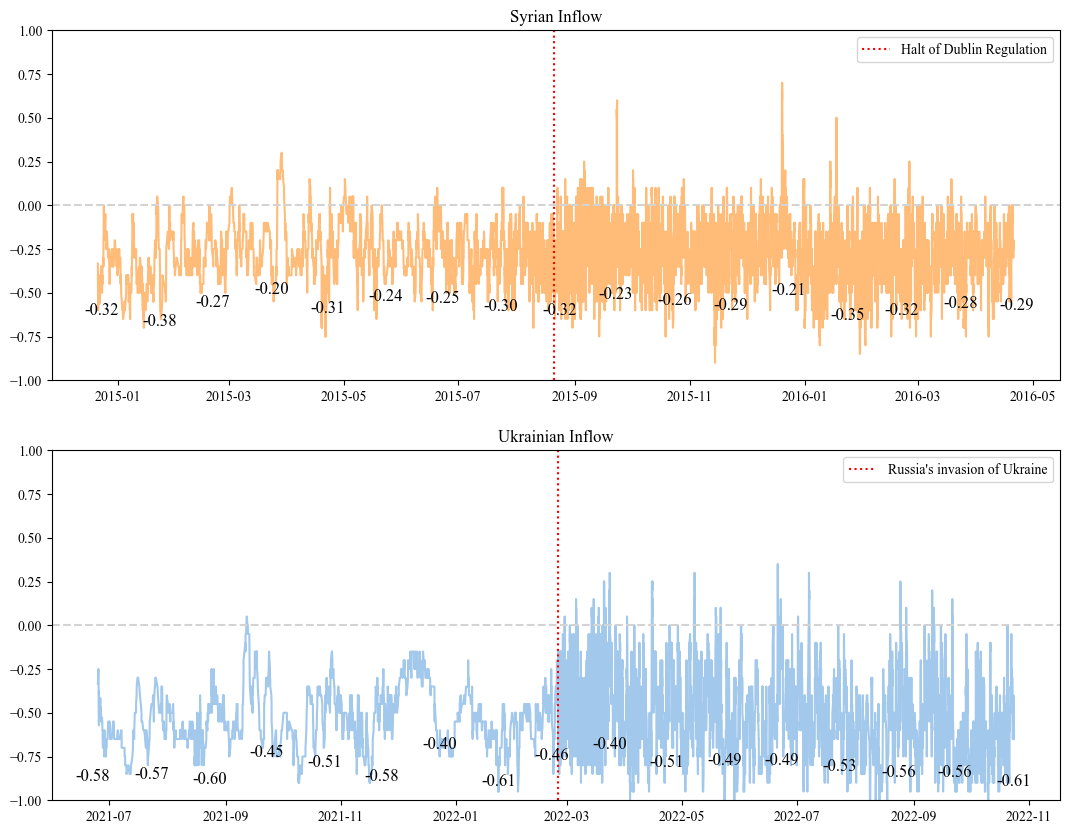

In [57]:
# plotting Moving Averages for each inflow using colorblind-friendly colors & Times New Roman

csfont = {'fontname':'Times New Roman'}

fix, axes = plt.subplots(2,1, figsize=(13,10))
custom_ylim = (-1,1)

plt.setp(axes, ylim=custom_ylim)

axes[0].plot(syrian['date_time'], syrian['Moving Average Sentiment'], color='#FFBC79')
axes[0].set_title("\n".join(['Syrian Inflow']), **csfont)
axes[0].axhline(0, color='lightgrey', ls='--')

axes[0].xaxis.set_ticklabels(axes[0].xaxis.get_ticklabels(), fontname="Times New Roman")
axes[0].yaxis.set_ticklabels(axes[0].yaxis.get_ticklabels(), fontname="Times New Roman")

# vertical line (center time point)
ax_vline = axes[0].axvline(datetime(2015, 8, 21), color = 'red', ls='dotted', label='Halt of Dublin Regulation')
leg = axes[0].legend(handles=[ax_vline])

# set font for the legend text
for text in leg.get_texts():
    text.set_fontname('Times New Roman')
    
# text annotations for average monthly sentiment
syrian_avg = syrian.groupby(pd.Grouper(key='date_time', freq='M'))['Moving Average Sentiment'].mean()
for i, v in syrian_avg.items():
    axes[0].annotate(f'{v:.2f}', xy=(i, v), xytext=(-10, -30), textcoords='offset points', fontsize=12, ha='center', va='top', **csfont)

axes[1].plot(ukrainian['date_time'], ukrainian['Moving Average Sentiment'], color='#A2C8EC')
axes[1].set_title("\n".join(['Ukrainian Inflow']), **csfont)
axes[1].axhline(0, color='lightgrey', ls='--')

axes[1].xaxis.set_ticklabels(axes[1].xaxis.get_ticklabels(), fontname="Times New Roman")
axes[1].yaxis.set_ticklabels(axes[1].yaxis.get_ticklabels(), fontname="Times New Roman")

#vertical line (center time point)
ax_vline = axes[1].axvline(datetime(2022, 2, 24), color = 'red', ls='dotted', label="Russia's invasion of Ukraine")
leg = axes[1].legend(handles=[ax_vline])

# set font for the legend text
for text in leg.get_texts():
    text.set_fontname('Times New Roman')
    
# text annotations for average monthly sentiment
ukrainian_avg = ukrainian.groupby(pd.Grouper(key='date_time', freq='M'))['Moving Average Sentiment'].mean()
for i, v in ukrainian_avg.items():
    axes[1].annotate(f'{v:.2f}', xy=(i, v), xytext=(-10, -30), textcoords='offset points', fontsize=12, ha='center', va='top', **csfont)

plt.savefig('10-Tweet_Moving-Avg_colorblind.png', bbox_inches='tight' , dpi=200)
plt.show()

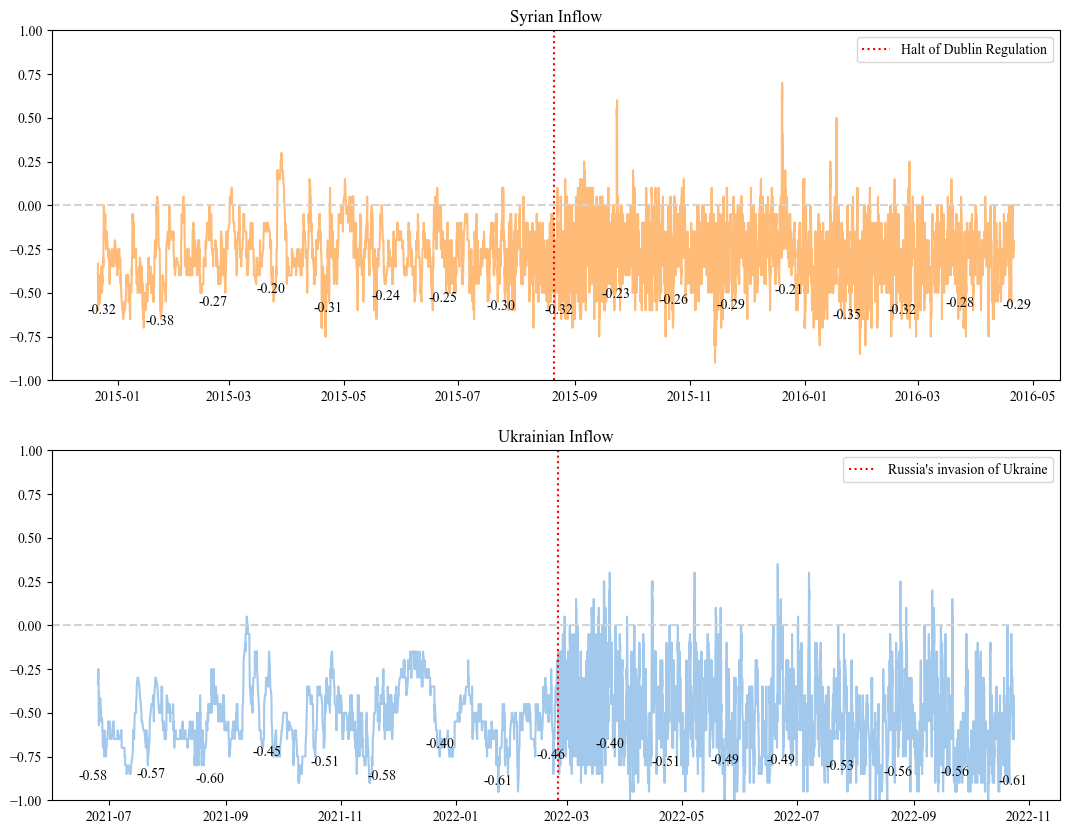

In [58]:
# plotting Moving Averages for each inflow using colorblind-friendly colors & Times New Roman

csfont = {'fontname':'Times New Roman'}

fix, axes = plt.subplots(2,1, figsize=(13,10))
custom_ylim = (-1,1)

plt.setp(axes, ylim=custom_ylim)

axes[0].plot(syrian['date_time'], syrian['Moving Average Sentiment'], color='#FFBC79')
axes[0].set_title("\n".join(['Syrian Inflow']), **csfont)
axes[0].axhline(0, color='lightgrey', ls='--')

# vertical line (center time point)
ax_vline = axes[0].axvline(datetime(2015, 8, 21), color = 'red', ls='dotted', label='Halt of Dublin Regulation')
leg = axes[0].legend(handles=[ax_vline])

# set font for the legend text
for text in leg.get_texts():
    text.set_fontname('Times New Roman')
    
# set font for tick labels
for tick in axes[0].get_xticklabels() + axes[0].get_yticklabels():
    tick.set_fontname('Times New Roman')
    
# text annotations for average monthly sentiment
syrian_avg = syrian.groupby(pd.Grouper(key='date_time', freq='M'))['Moving Average Sentiment'].mean()
for i, v in syrian_avg.items():
    axes[0].annotate(f'{v:.2f}', xy=(i, v), xytext=(-10, -30), textcoords='offset points', fontsize=10, ha='center', va='top', **csfont)

axes[1].plot(ukrainian['date_time'], ukrainian['Moving Average Sentiment'], color='#A2C8EC')
axes[1].set_title("\n".join(['Ukrainian Inflow']), **csfont)
axes[1].axhline(0, color='lightgrey', ls='--')

#vertical line (center time point)
ax_vline = axes[1].axvline(datetime(2022, 2, 24), color = 'red', ls='dotted', label="Russia's invasion of Ukraine")
leg = axes[1].legend(handles=[ax_vline])

# set font for the legend text
for text in leg.get_texts():
    text.set_fontname('Times New Roman')
    
# set font for tick labels
for tick in axes[1].get_xticklabels() + axes[1].get_yticklabels():
    tick.set_fontname('Times New Roman')
    
# text annotations for average monthly sentiment
ukrainian_avg = ukrainian.groupby(pd.Grouper(key='date_time', freq='M'))['Moving Average Sentiment'].mean()
for i, v in ukrainian_avg.items():
    axes[1].annotate(f'{v:.2f}', xy=(i, v), xytext=(-10, -30), textcoords='offset points', fontsize=10, ha='center', va='top', **csfont)

plt.savefig('10-Tweet_Moving-Avg_colorblind.png', bbox_inches='tight' , dpi=200)
plt.show()

I would also like to find out the total monthly average sentiment

In [59]:
df['year-month']

0        2016-04
1        2016-04
2        2016-04
3        2016-04
4        2016-04
          ...   
66259    2021-06
66260    2021-06
66261    2021-06
66262    2021-06
66263    2021-06
Name: year-month, Length: 66264, dtype: object

In [60]:
# finding monthly average sentiment

df.groupby('year-month').num_CLASS.mean()

year-month
2014-12   -0.319328
2015-01   -0.380531
2015-02   -0.257840
2015-03   -0.212245
2015-04   -0.303263
2015-05   -0.246914
2015-06   -0.251923
2015-07   -0.295662
2015-08   -0.318556
2015-09   -0.228763
2015-10   -0.263549
2015-11   -0.292739
2015-12   -0.209154
2016-01   -0.348315
2016-02   -0.321155
2016-03   -0.276869
2016-04   -0.294278
2021-06   -0.617021
2021-07   -0.546875
2021-08   -0.608280
2021-09   -0.442424
2021-10   -0.500000
2021-11   -0.583082
2021-12   -0.394904
2022-01   -0.615063
2022-02   -0.462039
2022-03   -0.401797
2022-04   -0.504425
2022-05   -0.491779
2022-06   -0.495108
2022-07   -0.527473
2022-08   -0.556886
2022-09   -0.557610
2022-10   -0.613216
Name: num_CLASS, dtype: float64

In [61]:
# creating a syrian & ukrainian dataset

df_syr = df[df.inflow == 'Syrians'].copy()

df_uk = df[df.inflow == 'Ukrainians'].copy()

#### 4.3.2. Before or during inflow?
I want to create a variable indicating whether its during the inflow (after center point) or before
* during syrian inflow: from 2015-08-21 onwards 
* before syrian inflow: before 2015-08-21

* during ukrainian inflow: from 2022-02-24 onwards
* before ukrainian inflow: before 2022-02-24 (but after April 21, 2016)

#### *Before inflow*

In [62]:
# assigning True to all tweets before syrian inflow

df['before_syrian_inflow'] = df['date_time'] < '2015-08-21'

In [63]:
df['before_syrian_inflow'].value_counts()

False    61977
True      4287
Name: before_syrian_inflow, dtype: int64

In [64]:
# assigning True to all tweets before ukrainian inflow 

df['before_ukrainian_inflow'] = (df['date_time'] < '2022-02-24') & (df['inflow']=='Ukrainians')

In [65]:
df['before_ukrainian_inflow'].value_counts()

False    64462
True      1802
Name: before_ukrainian_inflow, dtype: int64

In [66]:
df

,text,author_id,created_at,lang,geo.place_id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.impression_count,...,new text,scores,Negative,Neutral,Positive,CLASS,num_CLASS,date_time,before_syrian_inflow,before_ukrainian_inflow
0,"Syrisch-orthodoxer Bischof: ""Was im Nahen Oste...",4.122038e+09,2016-04-20 22:55:08+00:00,de,06d9a7c249c59bcd,0.0,0.0,0.0,0.0,0.0,...,"Syrisch-orthodoxer Bischof: ""Was im Nahen Oste...","['0.0679844', '0.88380396', '0.0482117', '']",0.067984,0.883804,0.048212,NEUTRAL,0,2016-04-20 22:55:08,False,False
1,"Habe schon lang nicht gehört, daß Flüchtling G...",1.179544e+09,2016-04-20 21:27:37+00:00,de,e99b714fe65be4fb,0.0,0.0,0.0,0.0,0.0,...,"Habe schon lang nicht gehört, daß Flüchtling G...","['0.3660313', '0.5833739', '0.05059479']",0.366031,0.583374,0.050595,NEUTRAL,0,2016-04-20 21:27:37,False,False
2,"""Es kommen kaum noch Flüchtlinge nach Griechen...",2.246076e+08,2016-04-20 21:18:58+00:00,de,3078869807f9dd36,0.0,0.0,0.0,0.0,0.0,...,"""Es kommen kaum noch Flüchtlinge nach Griechen...","['0.30297568', '0.4430802', '0.25394407']",0.302976,0.443080,0.253944,NEUTRAL,0,2016-04-20 21:18:58,False,False
3,Unsere 1. Kochshow für #Flüchtlinge. Super spi...,2.480764e+09,2016-04-20 18:25:11+00:00,de,8abc99434d4f5d28,0.0,0.0,4.0,0.0,0.0,...,Unsere 1. Kochshow für #Flüchtlinge. Super spi...,"['0.02260253', '0.07604674', '0.9013506', '']",0.022603,0.076047,0.901351,POSITIVE,1,2016-04-20 18:25:11,False,False
4,500 tote #Flüchtlinge im #Mittelmeer – Tragödi...,6.062653e+08,2016-04-20 16:27:28+00:00,de,e11a8b8e3771f9fa,0.0,1.0,0.0,0.0,0.0,...,500 tote #Flüchtlinge im #Mittelmeer – Tragödi...,"['0.6982864', '0.27545568', '0.02625783']",0.698286,0.275456,0.026258,NEGATIVE,-1,2016-04-20 16:27:28,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66259,"For day 1 of week 2, @AnnaMariaKonsta discusse...",1.104025e+08,2021-06-28 14:43:31+00:00,en,fcbb3c6e0a7eba22,0.0,1.0,2.0,0.0,0.0,...,"For day 1 of week 2, @user discusses the Socia...","['0.03550766', '0.82208896', '0.14240335']",0.035508,0.822089,0.142403,NEUTRAL,0,2021-06-28 14:43:31,False,True
66260,"@ariadneconill Europe is racist, but in a diff...",2.521809e+09,2021-06-27 13:03:29+00:00,en,e385d4d639c6a423,0.0,1.0,6.0,0.0,0.0,...,"@user Europe is racist, but in a different way...","['0.8931986', '0.09380516', '0.01299612']",0.893199,0.093805,0.012996,NEGATIVE,-1,2021-06-27 13:03:29,False,True
66261,"A labour of love, inspired by Middle-earth.\n\...",5.633818e+08,2021-06-27 08:37:21+00:00,en,257640324f249a73,0.0,1.0,17.0,0.0,0.0,...,"A labour of love, inspired by Middle-earth.\n\...","['0.15655968', '0.5201203', '0.32332003']",0.156560,0.520120,0.323320,NEUTRAL,0,2021-06-27 08:37:21,False,True
66262,@simongerman600 I must have missed the great f...,2.591892e+09,2021-06-26 08:03:22+00:00,en,000b71538f35fe46,0.0,0.0,1.0,0.0,0.0,...,@user I must have missed the great flight of t...,"['0.91320664', '0.06375945', '0.02303378']",0.913207,0.063759,0.023034,NEGATIVE,-1,2021-06-26 08:03:22,False,True


In [67]:
# creating 'before_inflow'

df['before_inflow'] = (df['before_syrian_inflow']==True) | (df['before_ukrainian_inflow']==True)

In [68]:
df['before_inflow'].value_counts()

False    60175
True      6089
Name: before_inflow, dtype: int64

In [69]:
df

,text,author_id,created_at,lang,geo.place_id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.impression_count,...,scores,Negative,Neutral,Positive,CLASS,num_CLASS,date_time,before_syrian_inflow,before_ukrainian_inflow,before_inflow
0,"Syrisch-orthodoxer Bischof: ""Was im Nahen Oste...",4.122038e+09,2016-04-20 22:55:08+00:00,de,06d9a7c249c59bcd,0.0,0.0,0.0,0.0,0.0,...,"['0.0679844', '0.88380396', '0.0482117', '']",0.067984,0.883804,0.048212,NEUTRAL,0,2016-04-20 22:55:08,False,False,False
1,"Habe schon lang nicht gehört, daß Flüchtling G...",1.179544e+09,2016-04-20 21:27:37+00:00,de,e99b714fe65be4fb,0.0,0.0,0.0,0.0,0.0,...,"['0.3660313', '0.5833739', '0.05059479']",0.366031,0.583374,0.050595,NEUTRAL,0,2016-04-20 21:27:37,False,False,False
2,"""Es kommen kaum noch Flüchtlinge nach Griechen...",2.246076e+08,2016-04-20 21:18:58+00:00,de,3078869807f9dd36,0.0,0.0,0.0,0.0,0.0,...,"['0.30297568', '0.4430802', '0.25394407']",0.302976,0.443080,0.253944,NEUTRAL,0,2016-04-20 21:18:58,False,False,False
3,Unsere 1. Kochshow für #Flüchtlinge. Super spi...,2.480764e+09,2016-04-20 18:25:11+00:00,de,8abc99434d4f5d28,0.0,0.0,4.0,0.0,0.0,...,"['0.02260253', '0.07604674', '0.9013506', '']",0.022603,0.076047,0.901351,POSITIVE,1,2016-04-20 18:25:11,False,False,False
4,500 tote #Flüchtlinge im #Mittelmeer – Tragödi...,6.062653e+08,2016-04-20 16:27:28+00:00,de,e11a8b8e3771f9fa,0.0,1.0,0.0,0.0,0.0,...,"['0.6982864', '0.27545568', '0.02625783']",0.698286,0.275456,0.026258,NEGATIVE,-1,2016-04-20 16:27:28,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66259,"For day 1 of week 2, @AnnaMariaKonsta discusse...",1.104025e+08,2021-06-28 14:43:31+00:00,en,fcbb3c6e0a7eba22,0.0,1.0,2.0,0.0,0.0,...,"['0.03550766', '0.82208896', '0.14240335']",0.035508,0.822089,0.142403,NEUTRAL,0,2021-06-28 14:43:31,False,True,True
66260,"@ariadneconill Europe is racist, but in a diff...",2.521809e+09,2021-06-27 13:03:29+00:00,en,e385d4d639c6a423,0.0,1.0,6.0,0.0,0.0,...,"['0.8931986', '0.09380516', '0.01299612']",0.893199,0.093805,0.012996,NEGATIVE,-1,2021-06-27 13:03:29,False,True,True
66261,"A labour of love, inspired by Middle-earth.\n\...",5.633818e+08,2021-06-27 08:37:21+00:00,en,257640324f249a73,0.0,1.0,17.0,0.0,0.0,...,"['0.15655968', '0.5201203', '0.32332003']",0.156560,0.520120,0.323320,NEUTRAL,0,2021-06-27 08:37:21,False,True,True
66262,@simongerman600 I must have missed the great f...,2.591892e+09,2021-06-26 08:03:22+00:00,en,000b71538f35fe46,0.0,0.0,1.0,0.0,0.0,...,"['0.91320664', '0.06375945', '0.02303378']",0.913207,0.063759,0.023034,NEGATIVE,-1,2021-06-26 08:03:22,False,True,True


In [70]:
df['before_inflow'].value_counts(normalize=True)

False    0.90811
True     0.09189
Name: before_inflow, dtype: float64

#### Remarks
We see that approx. 90 percent of all tweets were published during the inflow rather than before.

In [71]:
# finding the proportion of tweets published before by inflow

byinflow = df.groupby('inflow').before_inflow.value_counts(normalize=True)
byinflow

inflow      before_inflow
Syrians     False            0.825944
            True             0.174056
Ukrainians  False            0.956718
            True             0.043282
Name: before_inflow, dtype: float64

#### Remarks

We see a slight difference when grouping by inflow. About 96 percent of tweets surrounding the Ukrainian time-frame were published during the inflow, and only about 4 percent were published before. Looking at the Syrian time-frame, about 83 percent of tweets were published during the inflow, while about 17 percent were published before.

#### *During inflow*

In [72]:
# creating 'during_inflow'

df['during_inflow'] = df['before_inflow']==False

In [73]:
df

,text,author_id,created_at,lang,geo.place_id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.impression_count,...,Negative,Neutral,Positive,CLASS,num_CLASS,date_time,before_syrian_inflow,before_ukrainian_inflow,before_inflow,during_inflow
0,"Syrisch-orthodoxer Bischof: ""Was im Nahen Oste...",4.122038e+09,2016-04-20 22:55:08+00:00,de,06d9a7c249c59bcd,0.0,0.0,0.0,0.0,0.0,...,0.067984,0.883804,0.048212,NEUTRAL,0,2016-04-20 22:55:08,False,False,False,True
1,"Habe schon lang nicht gehört, daß Flüchtling G...",1.179544e+09,2016-04-20 21:27:37+00:00,de,e99b714fe65be4fb,0.0,0.0,0.0,0.0,0.0,...,0.366031,0.583374,0.050595,NEUTRAL,0,2016-04-20 21:27:37,False,False,False,True
2,"""Es kommen kaum noch Flüchtlinge nach Griechen...",2.246076e+08,2016-04-20 21:18:58+00:00,de,3078869807f9dd36,0.0,0.0,0.0,0.0,0.0,...,0.302976,0.443080,0.253944,NEUTRAL,0,2016-04-20 21:18:58,False,False,False,True
3,Unsere 1. Kochshow für #Flüchtlinge. Super spi...,2.480764e+09,2016-04-20 18:25:11+00:00,de,8abc99434d4f5d28,0.0,0.0,4.0,0.0,0.0,...,0.022603,0.076047,0.901351,POSITIVE,1,2016-04-20 18:25:11,False,False,False,True
4,500 tote #Flüchtlinge im #Mittelmeer – Tragödi...,6.062653e+08,2016-04-20 16:27:28+00:00,de,e11a8b8e3771f9fa,0.0,1.0,0.0,0.0,0.0,...,0.698286,0.275456,0.026258,NEGATIVE,-1,2016-04-20 16:27:28,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66259,"For day 1 of week 2, @AnnaMariaKonsta discusse...",1.104025e+08,2021-06-28 14:43:31+00:00,en,fcbb3c6e0a7eba22,0.0,1.0,2.0,0.0,0.0,...,0.035508,0.822089,0.142403,NEUTRAL,0,2021-06-28 14:43:31,False,True,True,False
66260,"@ariadneconill Europe is racist, but in a diff...",2.521809e+09,2021-06-27 13:03:29+00:00,en,e385d4d639c6a423,0.0,1.0,6.0,0.0,0.0,...,0.893199,0.093805,0.012996,NEGATIVE,-1,2021-06-27 13:03:29,False,True,True,False
66261,"A labour of love, inspired by Middle-earth.\n\...",5.633818e+08,2021-06-27 08:37:21+00:00,en,257640324f249a73,0.0,1.0,17.0,0.0,0.0,...,0.156560,0.520120,0.323320,NEUTRAL,0,2021-06-27 08:37:21,False,True,True,False
66262,@simongerman600 I must have missed the great f...,2.591892e+09,2021-06-26 08:03:22+00:00,en,000b71538f35fe46,0.0,0.0,1.0,0.0,0.0,...,0.913207,0.063759,0.023034,NEGATIVE,-1,2021-06-26 08:03:22,False,True,True,False


In [74]:
# creating a dataset for before inflow and during inflow

df_before = df[df.during_inflow == False].copy()
df_during = df[df.during_inflow == True].copy()

In [75]:
# finding relative frequencies of CLASS before inflow

df_before.CLASS.value_counts(normalize=True)

NEUTRAL     0.464280
NEGATIVE    0.450484
POSITIVE    0.085236
Name: CLASS, dtype: float64

In [76]:
# finding relative frequencies of CLASS during inflow

df_during.CLASS.value_counts(normalize=True)

NEUTRAL     0.696469
NEGATIVE    0.248592
POSITIVE    0.054940
Name: CLASS, dtype: float64

In [77]:
# finding relative frequencies of inflow before inflow

df_before.inflow.value_counts(normalize=True)

Syrians       0.704056
Ukrainians    0.295944
Name: inflow, dtype: float64

In [78]:
# finding relative frequencies of inflow during inflow

df_during.inflow.value_counts(normalize=True)

Ukrainians    0.661936
Syrians       0.338064
Name: inflow, dtype: float64

In [79]:
# re-establishing syrian & ukrainian dataset (to include to 'before_inflow' variable)

df_syr = df[df.inflow == 'Syrians'].copy()

df_uk = df[df.inflow == 'Ukrainians'].copy()

In [80]:
# finding the proportion of classes by before or during syrian inflow

bybord = df_syr.groupby('before_inflow').CLASS.value_counts(normalize=True)
bybord

before_inflow  CLASS   
False          NEUTRAL     0.546380
               NEGATIVE    0.365040
               POSITIVE    0.088581
True           NEUTRAL     0.544437
               NEGATIVE    0.372755
               POSITIVE    0.082808
Name: CLASS, dtype: float64

In [81]:
# finding the proportion of classes by before or during ukrainian inflow

bybord = df_uk.groupby('before_inflow').CLASS.value_counts(normalize=True)
bybord

before_inflow  CLASS   
False          NEUTRAL     0.773122
               NEGATIVE    0.189119
               POSITIVE    0.037759
True           NEGATIVE    0.635405
               NEUTRAL     0.273585
               POSITIVE    0.091010
Name: CLASS, dtype: float64

#### Remarks

Before the Syrian inflow, a little over half of tweets were neutral, over a third were negative, and a small proportion were positive. During the inflow, proportions remained largely similar.

When looking at before the Ukrainian inflow, by contrast, most tweets (almost two-thirds) were negative, and about a third were neutral. During the inflow, the largest proportion of tweets because neutral, and negative tweets fell to less than 20 percent.

This suggests that sentiments remained largely unchanged surrounding the Syrian inflow, while, surrounding the Ukrainian inflow, after Russia's invasion, tweets because much less negative and instead more neutral.

### 4.4 Exploring Language
#### 4.4.1. Exploring Language for entire datset

In [82]:
# getting the unique value counts of Language (absolute frequency)

df['Language'].value_counts()

German     53083
English    13181
Name: Language, dtype: int64

In [83]:
# getting the relative frequencies of Language

df['Language'].value_counts(normalize=True)

German     0.801084
English    0.198916
Name: Language, dtype: float64

#### 4.4.2. Exploring CLASS by Language

In [84]:
# finding the proportion of classes by Language

bylang = df.groupby('Language').CLASS.value_counts(normalize=True)
bylang

Language  CLASS   
English   NEGATIVE    0.526060
          NEUTRAL     0.317654
          POSITIVE    0.156286
German    NEUTRAL     0.763898
          NEGATIVE    0.202852
          POSITIVE    0.033250
Name: CLASS, dtype: float64

#### Remarks
We can see that about half of all tweets written in English were negative. German-language tweets, on the other hand, tended to be mostly neutral. That being said, negative tweets still substantially surpassed positive tweets written in German.

#### 4.4.3. Exploring Language by CLASS

In [85]:
# finding the proportion of classes by Language

byclass = df.groupby('CLASS').Language.value_counts(normalize=True)
byclass

CLASS     Language
NEGATIVE  German      0.608293
          English     0.391707
NEUTRAL   German      0.906409
          English     0.093591
POSITIVE  English     0.538562
          German      0.461438
Name: Language, dtype: float64

#### Remarks
About two-thirds of all Negative tweets were written in German, while only one-third were written in English. Almost all Neutral tweets were written in German, while less than 10 percent were written in English. Regarding positive tweets, about half were written in each language.

### 4.5 Exploring num_CLASS

In [86]:
df.num_CLASS.describe()

count    66264.000000
mean        -0.209420
std          0.530108
min         -1.000000
25%         -1.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: num_CLASS, dtype: float64

In [87]:
df_before.num_CLASS.describe()

count    6089.000000
mean       -0.365249
std         0.634334
min        -1.000000
25%        -1.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: num_CLASS, dtype: float64

In [88]:
df_during.num_CLASS.describe()

count    60175.000000
mean        -0.193652
std          0.515786
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: num_CLASS, dtype: float64

In [89]:
df_before.groupby('inflow').num_CLASS.describe()

,count,mean,std,min,25%,50%,75%,max
inflow,,,,,,,,
Syrians,4287.0,-0.289946,0.609575,-1.0,-1.0,0.0,0.0,1.0
Ukrainians,1802.0,-0.544395,0.655963,-1.0,-1.0,-1.0,0.0,1.0


In [90]:
df_during.groupby('inflow').num_CLASS.describe()

,count,mean,std,min,25%,50%,75%,max
inflow,,,,,,,,
Syrians,20343.0,-0.276459,0.614174,-1.0,-1.0,0.0,0.0,1.0
Ukrainians,39832.0,-0.151361,0.451634,-1.0,0.0,0.0,0.0,1.0


#### Remarks

Average sentiment before the inflow was -0.37. During the inflow, average sentiment became -0.19. Therefore, average sentiment was less negative during the inflows compared to before.

When looking at the Syrian inflow specifically, however, we see that average sentiment was -0.29 before and -0.28 during, showing little change. By comparison, surrounding the Ukrainian inflow, average sentiment changed more dramatically, from -0.54 before to -0.15 after, showing substantially improvement. 

### 4.5 Saving the data
The dataframe, containing all tweets (negative, neutral, and positive) are saved. A second dataframe containing only negative or positive tweets will be saved at the end of this notebook.

In [91]:
df.to_csv(CASS_thesis / '05_Explored-and-vizualized_limited_merged_categorical.csv')

## 5. Exploring with binary CLASS (Negative, Positive)
Now, all Neutral tweets will be dropped in order to focus only on tweets that carry Negative or Positive sentiment.

In [92]:
df.CLASS.value_counts()

NEUTRAL     44737
NEGATIVE    17702
POSITIVE     3825
Name: CLASS, dtype: int64

In [93]:
df = df.drop(df[df.CLASS == 'NEUTRAL'].index)

In [94]:
df.CLASS.value_counts()

NEGATIVE    17702
POSITIVE     3825
Name: CLASS, dtype: int64

In [95]:
df

,text,author_id,created_at,lang,geo.place_id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.impression_count,...,Negative,Neutral,Positive,CLASS,num_CLASS,date_time,before_syrian_inflow,before_ukrainian_inflow,before_inflow,during_inflow
3,Unsere 1. Kochshow für #Flüchtlinge. Super spi...,2.480764e+09,2016-04-20 18:25:11+00:00,de,8abc99434d4f5d28,0.0,0.0,4.0,0.0,0.0,...,0.022603,0.076047,0.901351,POSITIVE,1,2016-04-20 18:25:11,False,False,False,True
4,500 tote #Flüchtlinge im #Mittelmeer – Tragödi...,6.062653e+08,2016-04-20 16:27:28+00:00,de,e11a8b8e3771f9fa,0.0,1.0,0.0,0.0,0.0,...,0.698286,0.275456,0.026258,NEGATIVE,-1,2016-04-20 16:27:28,False,False,False,True
5,@hataibu @wendeiki Aber Hauptsache es kommen k...,2.715332e+09,2016-04-20 15:22:12+00:00,de,8abc99434d4f5d28,0.0,0.0,1.0,0.0,0.0,...,0.541075,0.379315,0.079610,NEGATIVE,-1,2016-04-20 15:22:12,False,False,False,True
6,#Boehmi schrieb #Schmähgedicht\n#Bundesregieru...,1.599137e+08,2016-04-20 13:56:27+00:00,de,3078869807f9dd36,0.0,1.0,1.0,0.0,0.0,...,0.731547,0.247820,0.020633,NEGATIVE,-1,2016-04-20 13:56:27,False,False,False,True
7,#Bamberg: Mitglied einer syrisch-islamistische...,8.978133e+07,2016-04-20 13:45:34+00:00,de,550c9e2e561a32bd,0.0,0.0,0.0,0.0,0.0,...,0.603958,0.375516,0.020525,NEGATIVE,-1,2016-04-20 13:45:34,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66256,"@RGrahamPE1 @maxrushden Agree, when you look a...",4.155022e+07,2021-06-30 10:41:16+00:00,en,c589d9d6ed38927c,0.0,0.0,0.0,0.0,0.0,...,0.843558,0.124553,0.031888,NEGATIVE,-1,2021-06-30 10:41:16,False,True,True,False
66257,So proud of our Ukrainian team!!! But I don’t ...,1.388233e+08,2021-06-29 21:50:55+00:00,en,cc5401f65b0ddc7b,0.0,0.0,2.0,0.0,0.0,...,0.383906,0.151763,0.464331,POSITIVE,1,2021-06-29 21:50:55,False,True,True,False
66260,"@ariadneconill Europe is racist, but in a diff...",2.521809e+09,2021-06-27 13:03:29+00:00,en,e385d4d639c6a423,0.0,1.0,6.0,0.0,0.0,...,0.893199,0.093805,0.012996,NEGATIVE,-1,2021-06-27 13:03:29,False,True,True,False
66262,@simongerman600 I must have missed the great f...,2.591892e+09,2021-06-26 08:03:22+00:00,en,000b71538f35fe46,0.0,0.0,1.0,0.0,0.0,...,0.913207,0.063759,0.023034,NEGATIVE,-1,2021-06-26 08:03:22,False,True,True,False


In [96]:
# resetting index

df = df.reset_index(drop=True)

In [97]:
df

,text,author_id,created_at,lang,geo.place_id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.impression_count,...,Negative,Neutral,Positive,CLASS,num_CLASS,date_time,before_syrian_inflow,before_ukrainian_inflow,before_inflow,during_inflow
0,Unsere 1. Kochshow für #Flüchtlinge. Super spi...,2.480764e+09,2016-04-20 18:25:11+00:00,de,8abc99434d4f5d28,0.0,0.0,4.0,0.0,0.0,...,0.022603,0.076047,0.901351,POSITIVE,1,2016-04-20 18:25:11,False,False,False,True
1,500 tote #Flüchtlinge im #Mittelmeer – Tragödi...,6.062653e+08,2016-04-20 16:27:28+00:00,de,e11a8b8e3771f9fa,0.0,1.0,0.0,0.0,0.0,...,0.698286,0.275456,0.026258,NEGATIVE,-1,2016-04-20 16:27:28,False,False,False,True
2,@hataibu @wendeiki Aber Hauptsache es kommen k...,2.715332e+09,2016-04-20 15:22:12+00:00,de,8abc99434d4f5d28,0.0,0.0,1.0,0.0,0.0,...,0.541075,0.379315,0.079610,NEGATIVE,-1,2016-04-20 15:22:12,False,False,False,True
3,#Boehmi schrieb #Schmähgedicht\n#Bundesregieru...,1.599137e+08,2016-04-20 13:56:27+00:00,de,3078869807f9dd36,0.0,1.0,1.0,0.0,0.0,...,0.731547,0.247820,0.020633,NEGATIVE,-1,2016-04-20 13:56:27,False,False,False,True
4,#Bamberg: Mitglied einer syrisch-islamistische...,8.978133e+07,2016-04-20 13:45:34+00:00,de,550c9e2e561a32bd,0.0,0.0,0.0,0.0,0.0,...,0.603958,0.375516,0.020525,NEGATIVE,-1,2016-04-20 13:45:34,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21522,"@RGrahamPE1 @maxrushden Agree, when you look a...",4.155022e+07,2021-06-30 10:41:16+00:00,en,c589d9d6ed38927c,0.0,0.0,0.0,0.0,0.0,...,0.843558,0.124553,0.031888,NEGATIVE,-1,2021-06-30 10:41:16,False,True,True,False
21523,So proud of our Ukrainian team!!! But I don’t ...,1.388233e+08,2021-06-29 21:50:55+00:00,en,cc5401f65b0ddc7b,0.0,0.0,2.0,0.0,0.0,...,0.383906,0.151763,0.464331,POSITIVE,1,2021-06-29 21:50:55,False,True,True,False
21524,"@ariadneconill Europe is racist, but in a diff...",2.521809e+09,2021-06-27 13:03:29+00:00,en,e385d4d639c6a423,0.0,1.0,6.0,0.0,0.0,...,0.893199,0.093805,0.012996,NEGATIVE,-1,2021-06-27 13:03:29,False,True,True,False
21525,@simongerman600 I must have missed the great f...,2.591892e+09,2021-06-26 08:03:22+00:00,en,000b71538f35fe46,0.0,0.0,1.0,0.0,0.0,...,0.913207,0.063759,0.023034,NEGATIVE,-1,2021-06-26 08:03:22,False,True,True,False


### 5.1. Exploring CLASS
#### 5.1.1. Exploring CLASS for entire dataset

In [98]:
# getting the relative frequencies of CLASS

df['CLASS'].value_counts(normalize=True)

NEGATIVE    0.822316
POSITIVE    0.177684
Name: CLASS, dtype: float64

<AxesSubplot: ylabel='CLASS'>

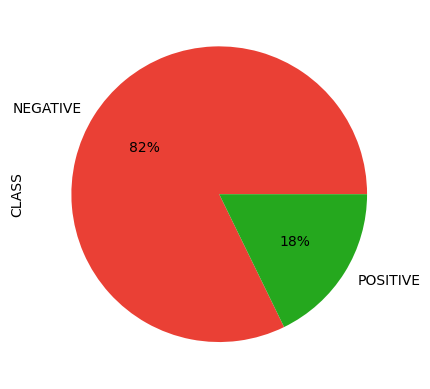

In [99]:
# pie chart

# first color: redish hex code
# second color: greenish hex code

colors = '#EA4035', '#25A81E'

# adding percentages

df.CLASS.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=colors)

#### Remarks
The majority (over 80 percent) of all tweets were negative.

#### 5.1.2. Exploring CLASS by inflow

In [100]:
# finding the proportion of classes by inflow

byinflow = df.groupby('inflow').CLASS.value_counts(normalize=True)
byinflow

inflow      CLASS   
Syrians     NEGATIVE    0.807083
            POSITIVE    0.192917
Ukrainians  NEGATIVE    0.838778
            POSITIVE    0.161222
Name: CLASS, dtype: float64

#### Remarks

Surrounding both inflows, tweets were largely negative. However, surrounding the Syrian inflow, negativity was slightly lower and positivity slightly higher.

### 5.2. Exploring by date

In [101]:
# finding the proportion of classes by before or during

bybord = df.groupby('before_inflow').CLASS.value_counts(normalize=True)
bybord

before_inflow  CLASS   
False          NEGATIVE    0.818998
               POSITIVE    0.181002
True           NEGATIVE    0.840895
               POSITIVE    0.159105
Name: CLASS, dtype: float64

#### Remarks

Both before and during the inlow, most tweets were negative. However, the proportion of negative tweets during the inflows (approx. 82%) was lower than before the inflows (approx. 84%). In other words, negativity slightly decreased, in contradiction to theories that inflows trigger negative sentiment.

In [102]:
# re-establishing syrian & ukrainian dataset (to use binary CLASS)

df_syr = df[df.inflow == 'Syrians'].copy()

df_uk = df[df.inflow == 'Ukrainians'].copy()

In [103]:
# finding the proportion of classes by before or during syrian inflow

bybord = df_syr.groupby('before_inflow').CLASS.value_counts(normalize=True)
bybord

before_inflow  CLASS   
False          NEGATIVE    0.804725
               POSITIVE    0.195275
True           NEGATIVE    0.818228
               POSITIVE    0.181772
Name: CLASS, dtype: float64

#### Remarks

The sentiment distribution surrounding the Syrian inflow resembles that of the entire dataset. That is, tweets were mostly negative and became slightly less negative during the inflow (80%) compared to before (82%).

In [104]:
# finding the proportion of classes by before or during ukrainian inflow

bybord = df_uk.groupby('before_inflow').CLASS.value_counts(normalize=True)
bybord

before_inflow  CLASS   
False          NEGATIVE    0.833573
               POSITIVE    0.166427
True           NEGATIVE    0.874714
               POSITIVE    0.125286
Name: CLASS, dtype: float64

#### Remarks

Again, the sentiment distribution surrounding the Ukrainian inflow resembles that of the entire dataset. That is, tweets were mostly negative and became slightly less negative during the inflow (83%) compared to before (87%).

### 5.3. Exploring Language
#### 5.3.1. Exploring Language for entire dataset

In [105]:
# getting the unique value counts of Language (absolute frequency)

df['Language'].value_counts()

German     12533
English     8994
Name: Language, dtype: int64

In [106]:
# getting the relative frequencies of Language

df['Language'].value_counts(normalize=True)

German     0.582199
English    0.417801
Name: Language, dtype: float64

#### 5.3.2. Exploring Language by CLASS

In [107]:
# finding the proportion of classes by Language

bylang = df.groupby('Language').CLASS.value_counts(normalize=True)
bylang

Language  CLASS   
English   NEGATIVE    0.770958
          POSITIVE    0.229042
German    NEGATIVE    0.859172
          POSITIVE    0.140828
Name: CLASS, dtype: float64

#### Remarks

German-language tweets were more negative compared to English-language tweets.

### 5.4 Saving the data
Finally, the dataframe containing only negative or positive tweets is saved.

In [108]:
df.to_csv(CASS_thesis / '05_Explored-and-vizualized_limited_merged_binary.csv')